# Assignment 2: Hand Gesture Recognition [50 Pt]

This assignment will be completed in two parts. In Part A you will gain experience gathering your own data set (specifically images of hand gestures), and understand the challenges involved in the data cleaning process. In Part B you will train a convolutional neural network to make classifications on different hand gestures. By the end of this assignment, you should be able to:

1. Generate and preprocess your own data
2. Load and split data for training, validation and testing
3. Train a Convolutional Neural Network
4. Apply transfer learning to improve your model

Note that for this assignment we will not be providing you with any starter code. You should be able to take the sample code provided in the preparation sample code, previous assignment, and lectures and modify it accordingly to complete the tasks outlined below.

*This assignment is based on an assignment developed by Prof. Lisa Zhang.*

### What to submit

**Submission for Part A:**  
Submit a zip file containing your images. Three images each of American Sign Language gestures for letters A - I (total of 27 images). You will be required to clean the images before submitting them. Details are provided under Part A of the handout.

Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg).


**Submission for Part B:**  
Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission.

## Colab Link

Include a link to your colab file here and ensure the file can be accessed by the our teaching team.


In [ ]:
# TO BE COMPLETED

# http://

# Part A. Data Collection [5pt]

So far, we have worked with data sets that have been collected, cleaned, and curated by machine learning
researchers and practitioners. Datasets like MNIST and CIFAR are often used as toy examples, both by
students and by researchers testing new machine learning models.

In the real world, getting a clean data set is never that easy. More than half the work in applying machine
learning is finding, gathering, cleaning, and formatting your data set.

The purpose of this assignment is to help you gain experience gathering your own data set, and understand the
challenges involved in the data cleaning process.

### American Sign Language

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing.

The hand gestures representing English alphabet are shown below. This assignment focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)


### Generating Data
We will produce the images required to assess our models by ourselves. You are required to collect, clean and submit
three images each of Americal Sign Language gestures for letters A - I (total of 27 images)
Steps involved in data collection

1. Familiarize yourself with American Sign Language gestures for letters from A - I (9 letters).
2. Take three pictures at slightly different orientation for each letter gesture using your
mobile phone.
 - Ensure adequate lighting while you are capturing the images.
 - Use a white wall as your background.
 - Use your right hand to create gestures (for consistency).
 - Keep your right hand fairly apart from your body and any other obstructions.
 - Avoid having shadows on parts of your hand.
3. Transfer the images to your laptop for cleaning.

### Cleaning Data
To simplify the machine learning the task, we will standardize the training images. We will make sure that
all our images are of the same size (224 x 224 pixels RGB), and have the hand in the center of the cropped
regions.

You may use the following applications to crop and resize your images:

**Mac**
- Use Preview:
– Holding down CMD + Shift will keep a square aspect ratio while selecting the hand area.
– Resize to 224x224 pixels.

**Windows 10**
- Use Photos app to edit and crop the image and keep the aspect ratio a square.
- Use Paint to resize the image to the final image size of 224x224 pixels.

**Linux**
- You can use GIMP, imagemagick, or other tools of your choosing.
You may also use online tools such as http://picresize.com
All the above steps are illustrative only. You need not follow these steps but following these will ensure that
you produce a good quality dataset. You will be judged based on the quality of the images alone.
Please do not edit your photos in any other way. You should not need to change the aspect ratio of your
image. You also should not digitally remove the background or shadows—instead, take photos with a white
background and minimal shadows.

### Accepted Images
Images will be accepted and graded based on the criteria below
1. The final image should be size 224x224 pixels (RGB).
2. The file format should be a .jpg file.
3. The hand should be approximately centered on the frame.
4. The hand should not be obscured or cut off.
5. The photos follows the ASL gestures posted earlier.
6. The photos were not edited in any other way (e.g. no electronic removal of shadows or background).

### Submission
Submit a zip file containing your images. There should be a total of 27 images (3 for each category)
1. Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg)
2. Zip all the images together and name it with the following convention: last-name_student-number.zip
(e.g. last-name_100343434.zip).
3. Submit the zipped folder.

![alt text](https://github.com/UTNeural/APS360/blob/master/Gesture%20Images.PNG?raw=true)

# Part B. Building a CNN [45pt]

For this assignment, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to modify and combine code provided previously in the course (assignments, preparation code, lectures, etc.). You can also write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all code that you submit must be be your own. You cannot take a completed assignment and claim it as your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous assignments.** Make sure that you give yourself plenty of time by starting early.

## Part 1. Data Loading and Splitting [3pt EXPLORATORY]

Download the anonymized data provided on Quercus. Split the data into training, validation, and test sets.

Note: Data splitting is not as trivial in this assignment. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html)

In [ ]:
!pip install split-folders

In [ ]:
import os
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import cv2
import torch.optim as optim #for gradient descent

import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
import splitfolders
import torchvision
from sklearn.preprocessing import LabelEncoder
import math
from tqdm import tqdm
import time

In [ ]:
# TO BE COMPLETED

splitfolders.ratio("Lab_3b_Gesture_Dataset", output="Gesture_Dataset", seed=1, ratio=(.8, .1, .1), group_prefix=None) # default values

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()])


train_set = torchvision.datasets.ImageFolder(root='Gesture_Dataset/train', transform=transform)
validation_set = torchvision.datasets.ImageFolder(root='Gesture_Dataset/val', transform=transform)
test_set = torchvision.datasets.ImageFolder(root='Gesture_Dataset/test', transform=transform)



Copying files: 2431 files [00:00, 10904.90 files/s]


In [ ]:
train_set

Dataset ImageFolder
    Number of datapoints: 1941
    Root location: Gesture_Dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )

In [ ]:
validation_set

Dataset ImageFolder
    Number of datapoints: 240
    Root location: Gesture_Dataset/val
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )

In [ ]:
test_set

Dataset ImageFolder
    Number of datapoints: 250
    Root location: Gesture_Dataset/test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW


First, through splitfolders, the data in the folder was divided into train: 0.8, val: 0.1, and test: 0.1 and saved individually.
And then The data saved in this way was resized to 224x224 and then transformed into a tensor.

train_set : 1941
val_set : 240
test_set : 250


'''

'\nPROVIDE YOUR ANSWER BELOW\n\n\nFirst, through splitfolders, the data in the folder was divided into train: 0.8, val: 0.1, and test: 0.1 and saved individually.\nAnd then The data saved in this way was resized to 224x224 and then transformed into a tensor.\n\ntrain_set : 1941\nval_set : 240\ntest_set : 250\n\n\n'

## Part 2. Model Building and Sanity Checking [5pt]

### Part (i) Convolutional Network [2pt MODEL]

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

In [ ]:
class GestureCNN(nn.Module):
    def __init__(self):
        super(GestureCNN, self).__init__()
        self.name = "GestureCNN"
        self.conv1 = nn.Conv2d(3, 9, 3, padding=1) # in_channel, out_channel, kernel size
        self.pool = nn.MaxPool2d(2, 2)  # Pooling
        self.conv2 = nn.Conv2d(9, 12, 3, padding=1)
        self.fc1 = nn.Linear(12 * 56 * 56, 64)  # Fully connected 1
        self.fc2 = nn.Linear(64, 9) # Fully connected 2, output 9 categories
        self.batchN1 = nn.BatchNorm2d(9)
        self.batchN2 = nn.BatchNorm2d(12)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.batchN1(self.conv1(x))))
        x = self.pool(nn.functional.relu(self.batchN2(self.conv2(x))))
        x = x.view(-1, 12 * 56 * 56)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

The `GestureCNN` class is a convolutional neural network architecture designed for gesture letter prediction from 224x224 RGB images.
Here's a brief summary of the architecture:

- Input: 224x224 RGB images.
- Layers: Two convolutional layers followed by two fully connected layers.
- Convolutional Layers: Both layers have a 3x3 kernel size with padding, producing 6 and 12 output channels respectively.
- Pooling: Max pooling with a 2x2 kernel and stride of 2 after each convolutional layer.
- Batch Normalization: Applied after each convolutional layer for stabilization and faster training.
- Activation Functions: ReLU activation applied after each convolutional layer and the first fully connected layer.
- Fully Connected Layers: First layer with 64 hidden units, followed by an output layer with 9 units for gesture letter prediction.

This architecture combines convolutional and fully connected layers along with batch normalization
and ReLU activation to learn hierarchical features from input images and predict gesture letters.

'''

"\nPROVIDE YOUR ANSWER BELOW\n\nThe `GestureCNN` class is a convolutional neural network architecture designed for gesture letter prediction from 224x224 RGB images. \nHere's a brief summary of the architecture:\n\n- Input: 224x224 RGB images.\n- Layers: Two convolutional layers followed by two fully connected layers.\n- Convolutional Layers: Both layers have a 3x3 kernel size with padding, producing 6 and 12 output channels respectively.\n- Pooling: Max pooling with a 2x2 kernel and stride of 2 after each convolutional layer.\n- Batch Normalization: Applied after each convolutional layer for stabilization and faster training.\n- Activation Functions: ReLU activation applied after each convolutional layer and the first fully connected layer.\n- Fully Connected Layers: First layer with 64 hidden units, followed by an output layer with 9 units for gesture letter prediction.\n\nThis architecture combines convolutional and fully connected layers along with batch normalization \nand ReLU ac

### Part (ii) Training Code [2pt MODEL]

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

In [ ]:
def get_model_name(name, batch_size, learning_rate, epoch):

    if not os.path.exists("checkpoint"):
        os.makedirs("checkpoint")

    path = "checkpoint/model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                               batch_size,
                                                               learning_rate,
                                                               epoch)

    return path


def get_accuracy(model, batch_size=64, train=False, use_cuda=False):
    if train:
        data = train_set
    else:
        data = validation_set

    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size):

        #############################################
        #To Enable GPU Usage
        if use_cuda:
          imgs = imgs.cuda(2)
          labels = labels.cuda(2)
        #############################################
        output = model(imgs)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

def train(model, data, batch_size=64, num_epochs=1, learning_rate = 0.01, use_cuda=False):
    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    start_time = time.time()
    for epoch in tqdm(range(num_epochs), desc="Epochs"):

      for i, (imgs, labels) in enumerate(train_loader, 0):

        #############################################
        #To Enable GPU Usage
        if use_cuda:
          imgs = imgs.cuda(2)
          labels = labels.cuda(2)
        #############################################

        out = model(imgs)             # forward pass
        loss = criterion(out, labels) # compute the total loss
        loss.backward()               # backward pass (compute parameter updates)
        optimizer.step()              # make the updates for each parameter
        optimizer.zero_grad()         # a clean up step for PyTorch

        # save the current training information
        iters.append(n)
        losses.append(float(loss)/batch_size)             # compute *average* loss
        train_acc.append(get_accuracy(model, batch_size=batch_size, train=True, use_cuda=use_cuda)) # compute training accuracy
        val_acc.append(get_accuracy(model, batch_size=batch_size, train=False, use_cuda=use_cuda))  # compute validation accuracy
        n += 1


      end_time = time.time()
      elapsed_time = end_time - start_time
      model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
      torch.save(model.state_dict(), model_path)
      print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {float(loss)/batch_size}, train_acc : {train_acc[-1]}, val_acc : {val_acc[-1]}, Time: {elapsed_time:.2f} seconds')


    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

CUDA is available!  Training on GPU ...


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Epochs:  10%|█         | 1/10 [01:30<13:32, 90.25s/it]

Epoch [1/10], Loss: 0.025302108377218246, train_acc : 0.6079340546110252, val_acc : 0.6208333333333333, Time: 90.25 seconds


Epochs:  20%|██        | 2/10 [03:00<12:01, 90.24s/it]

Epoch [2/10], Loss: 0.025316882878541946, train_acc : 0.6594538897475528, val_acc : 0.6083333333333333, Time: 180.47 seconds


Epochs:  30%|███       | 3/10 [04:30<10:30, 90.12s/it]

Epoch [3/10], Loss: 0.008386887609958649, train_acc : 0.6980937660999484, val_acc : 0.675, Time: 270.44 seconds


Epochs:  40%|████      | 4/10 [05:59<08:57, 89.66s/it]

Epoch [4/10], Loss: 0.007631302811205387, train_acc : 0.788768675940237, val_acc : 0.7458333333333333, Time: 359.39 seconds


Epochs:  50%|█████     | 5/10 [07:29<07:29, 89.87s/it]

Epoch [5/10], Loss: 0.006491573061794043, train_acc : 0.8433797011849562, val_acc : 0.7875, Time: 449.64 seconds


Epochs:  60%|██████    | 6/10 [09:00<06:00, 90.05s/it]

Epoch [6/10], Loss: 0.007704535964876413, train_acc : 0.8825347758887172, val_acc : 0.7541666666666667, Time: 540.04 seconds


Epochs:  70%|███████   | 7/10 [10:30<04:30, 90.07s/it]

Epoch [7/10], Loss: 0.0020510938484221697, train_acc : 0.9170530654301906, val_acc : 0.7916666666666666, Time: 630.14 seconds


Epochs:  80%|████████  | 8/10 [11:59<02:59, 89.93s/it]

Epoch [8/10], Loss: 0.0016160222003236413, train_acc : 0.9273570324574961, val_acc : 0.7791666666666667, Time: 719.78 seconds


Epochs:  90%|█████████ | 9/10 [13:29<01:29, 89.84s/it]

Epoch [9/10], Loss: 0.0009271901799365878, train_acc : 0.9536321483771252, val_acc : 0.7875, Time: 809.43 seconds


Epochs: 100%|██████████| 10/10 [14:59<00:00, 89.99s/it]

Epoch [10/10], Loss: 0.00046940799802541733, train_acc : 0.9572385368366821, val_acc : 0.7916666666666666, Time: 899.85 seconds


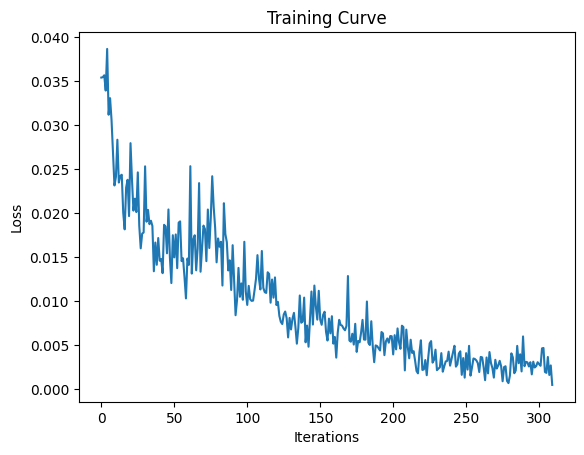

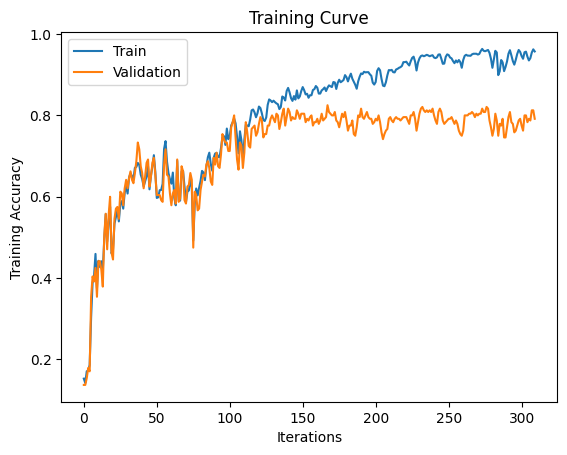

Final Training Accuracy: 0.9572385368366821
Final Validation Accuracy: 0.7916666666666666


In [ ]:
# TO BE COMPLETED

model = GestureCNN()
use_cuda = False

if torch.cuda.is_available():
  use_cuda = True
  model.cuda(2)
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')


train(model, train_set, batch_size=64, num_epochs=10, learning_rate = 0.01, use_cuda=use_cuda)



In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

Loss Function: CrossEntropyLoss is chosen as the loss function.
Optimizer: Stochastic Gradient Descent (SGD) optimizer with momentum is utilized.
Checkpointing: My model is checkpointed periodically during training.


'''

'\nPROVIDE YOUR ANSWER BELOW\n\nLoss Function: CrossEntropyLoss is chosen as the loss function. \nOptimizer: Stochastic Gradient Descent (SGD) optimizer with momentum is utilized.\nCheckpointing: My model is checkpointed periodically during training. \n\n\n'

### Part (iii) “Overfit” to a Small Dataset - [1pt MODEL]

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, you should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

In [ ]:
train_set_small = torchvision.datasets.ImageFolder(root='LEE_1010826714', transform=transform)

In [ ]:
def train_small(model, data, batch_size=64, num_epochs=1, learning_rate = 0.01, use_cuda=False):
    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    iters, losses, train_acc = [], [], []

    # training
    n = 0 # the number of iterations
    start_time = time.time()
    for epoch in range(num_epochs):

      for imgs, labels in iter(train_loader):

        #############################################
        #To Enable GPU Usage
        if use_cuda:
          imgs = imgs.cuda(2)
          labels = labels.cuda(2)
        #############################################

        model.train()
        out = model(imgs)             # forward pass

        loss = criterion(out, labels) # compute the total loss
        loss.backward()               # backward pass (compute parameter updates)
        optimizer.step()              # make the updates for each parameter
        optimizer.zero_grad()         # a clean up step for PyTorch

        # save the current training information
        iters.append(n)
        losses.append(float(loss)/batch_size)             # compute *average* loss

        train_acc.append(get_accuracy_small(model, batch_size=batch_size, train=True, use_cuda=use_cuda)) # compute training accuracy
        n += 1


      end_time = time.time()
      elapsed_time = end_time - start_time
      print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {float(loss)/batch_size}, train_acc : {train_acc[-1]}, Time: {elapsed_time:.2f} seconds')

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
def get_accuracy_small(model,  train=False, batch_size=27, use_cuda=False):
    if train:
        data = train_set_small
    else:
        data = train_set_small

    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=batch_size):

      #############################################
      #To Enable GPU Usage
      if use_cuda:
        imgs = imgs.cuda(2)
        labels = labels.cuda(2)
      #############################################
      output = model(imgs)

      #select index with maximum prediction score
      pred = output.max(1, keepdim=True)[1]
      correct += pred.eq(labels.view_as(pred)).sum().item()
      total += imgs.shape[0]
    return correct / total


CUDA is available!  Training on GPU ...
Epoch [1/20], Loss: 0.08173696200052898, train_acc : 0.3333333333333333, Time: 0.08 seconds
Epoch [2/20], Loss: 0.07720525176436813, train_acc : 0.5925925925925926, Time: 0.14 seconds
Epoch [3/20], Loss: 0.07103319962819417, train_acc : 0.8888888888888888, Time: 0.19 seconds
Epoch [4/20], Loss: 0.06327844549108434, train_acc : 0.8518518518518519, Time: 0.25 seconds
Epoch [5/20], Loss: 0.054638323960480864, train_acc : 0.8518518518518519, Time: 0.31 seconds
Epoch [6/20], Loss: 0.04583481947580973, train_acc : 0.8148148148148148, Time: 0.36 seconds
Epoch [7/20], Loss: 0.03753929668002658, train_acc : 0.8888888888888888, Time: 0.42 seconds
Epoch [8/20], Loss: 0.029875424173143175, train_acc : 1.0, Time: 0.48 seconds
Epoch [9/20], Loss: 0.023292550334223994, train_acc : 1.0, Time: 0.54 seconds
Epoch [10/20], Loss: 0.017916777619609126, train_acc : 1.0, Time: 0.59 seconds
Epoch [11/20], Loss: 0.013703274506109732, train_acc : 1.0, Time: 0.65 seconds
E

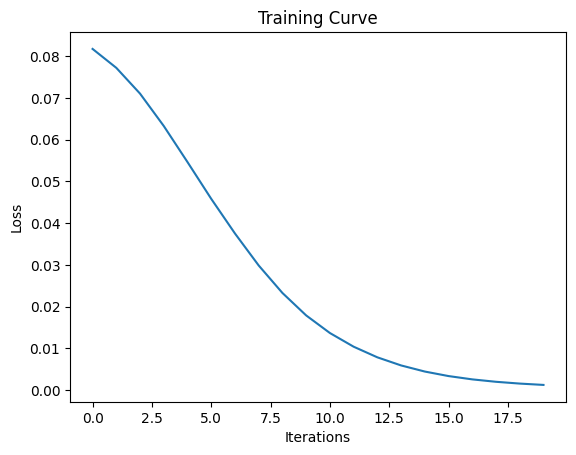

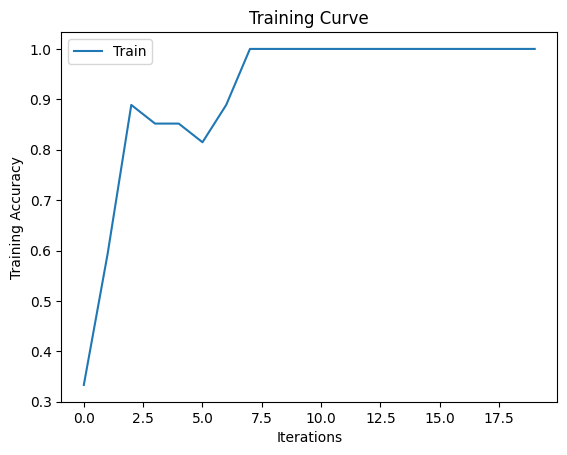

Final Training Accuracy: 1.0


In [ ]:
model = GestureCNN()

if torch.cuda.is_available():
  use_cuda = True
  model.cuda(2)
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_small(model, train_set_small, batch_size=27, num_epochs=20,learning_rate=0.001,use_cuda=use_cuda)

## Part 3. Hyperparameter Search [7pt]

### Part (i) - [2pt EXPLORATORY]

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

I think [learing rate, batch size, kernel size] are the most worth hyperparameter.
learning rate, batch size, kernel size가 가장 가치있는 hyperparameters라고 생각한다.

I think that [learning rate, batch size, kernel size] are the most crucial hyperparameters.

These three parameters have significant impact on training and model performance:

1. Learning Rate: It influences convergence speed and model stability.
2. Batch Size: It affects training stability and generalization.
3. Kernel Size: It captures features at different scales and complexities.

Optimizing these hyperparameters is essential for effective training and model performance.

'''

'\nPROVIDE YOUR ANSWER BELOW\n\nI think [learing rate, batch size, kernel size] are the most worth hyperparameter.\nlearning rate, batch size, kernel size가 가장 가치있는 hyperparameters라고 생각한다.\n\nI think that [learning rate, batch size, kernel size] are the most crucial hyperparameters.\n\nThese three parameters have significant impact on training and model performance:\n\n1. Learning Rate: It influences convergence speed and model stability.\n2. Batch Size: It affects training stability and generalization.\n3. Kernel Size: It captures features at different scales and complexities.\n\nOptimizing these hyperparameters is essential for effective training and model performance.\n\n'

### Part (ii) - [1pt MODEL]

Tune the hyperparameters you listed in Part (i), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

CUDA is available!  Training on GPU ...


Epochs:   5%|▌         | 1/20 [00:46<14:46, 46.66s/it]

Epoch [1/20], Loss: 0.012296502478420734, train_acc : 0.6043276661514683, val_acc : 0.5833333333333334, Time: 46.66 seconds


Epochs:  10%|█         | 2/20 [01:41<15:26, 51.47s/it]

Epoch [2/20], Loss: 0.00973561592400074, train_acc : 0.7331272539927872, val_acc : 0.6916666666666667, Time: 101.50 seconds


Epochs:  15%|█▌        | 3/20 [02:38<15:19, 54.08s/it]

Epoch [3/20], Loss: 0.005095414351671934, train_acc : 0.7557959814528593, val_acc : 0.7166666666666667, Time: 158.69 seconds


Epochs:  20%|██        | 4/20 [03:37<14:56, 56.03s/it]

Epoch [4/20], Loss: 0.005005271174013615, train_acc : 0.7985574446161773, val_acc : 0.7083333333333334, Time: 217.72 seconds


Epochs:  25%|██▌       | 5/20 [04:36<14:17, 57.17s/it]

Epoch [5/20], Loss: 0.00645428616553545, train_acc : 0.8098918083462133, val_acc : 0.725, Time: 276.90 seconds


Epochs:  30%|███       | 6/20 [05:24<12:34, 53.87s/it]

Epoch [6/20], Loss: 0.00434431666508317, train_acc : 0.8645028335909325, val_acc : 0.75, Time: 324.37 seconds


Epochs:  35%|███▌      | 7/20 [06:11<11:13, 51.83s/it]

Epoch [7/20], Loss: 0.0026482671964913607, train_acc : 0.8624420401854714, val_acc : 0.7375, Time: 372.00 seconds


Epochs:  40%|████      | 8/20 [06:58<10:03, 50.26s/it]

Epoch [8/20], Loss: 0.0007917539332993329, train_acc : 0.9314786192684184, val_acc : 0.7791666666666667, Time: 418.89 seconds


Epochs:  45%|████▌     | 9/20 [07:46<09:02, 49.34s/it]

Epoch [9/20], Loss: 0.0018209179397672415, train_acc : 0.9623905203503349, val_acc : 0.8041666666666667, Time: 466.21 seconds


Epochs:  50%|█████     | 10/20 [08:33<08:07, 48.77s/it]

Epoch [10/20], Loss: 0.0008128538029268384, train_acc : 0.98145285935085, val_acc : 0.8083333333333333, Time: 513.72 seconds


Epochs:  55%|█████▌    | 11/20 [09:20<07:13, 48.21s/it]

Epoch [11/20], Loss: 0.00013409122766461223, train_acc : 0.9835136527563112, val_acc : 0.7875, Time: 560.65 seconds


Epochs:  60%|██████    | 12/20 [10:07<06:23, 47.89s/it]

Epoch [12/20], Loss: 2.8203701731399633e-05, train_acc : 0.9948480164863472, val_acc : 0.825, Time: 607.80 seconds


Epochs:  65%|██████▌   | 13/20 [10:54<05:33, 47.64s/it]

Epoch [13/20], Loss: 8.379984501516446e-05, train_acc : 0.9974240082431737, val_acc : 0.8083333333333333, Time: 654.86 seconds


Epochs:  70%|███████   | 14/20 [11:42<04:45, 47.50s/it]

Epoch [14/20], Loss: 6.403997394954786e-05, train_acc : 0.9984544049459042, val_acc : 0.8208333333333333, Time: 702.06 seconds


Epochs:  75%|███████▌  | 15/20 [12:43<04:18, 51.65s/it]

Epoch [15/20], Loss: 9.35444695642218e-05, train_acc : 0.9984544049459042, val_acc : 0.8208333333333333, Time: 763.31 seconds


Epochs:  80%|████████  | 16/20 [13:47<03:41, 55.46s/it]

Epoch [16/20], Loss: 1.942697235790547e-05, train_acc : 0.9994848016486347, val_acc : 0.8208333333333333, Time: 827.64 seconds


Epochs:  85%|████████▌ | 17/20 [14:49<02:52, 57.45s/it]

Epoch [17/20], Loss: 7.938489943626337e-06, train_acc : 0.9994848016486347, val_acc : 0.8166666666666667, Time: 889.69 seconds


Epochs:  90%|█████████ | 18/20 [15:51<01:57, 58.78s/it]

Epoch [18/20], Loss: 1.0823083357536234e-05, train_acc : 0.9994848016486347, val_acc : 0.825, Time: 951.58 seconds


Epochs:  95%|█████████▌| 19/20 [16:54<01:00, 60.04s/it]

Epoch [19/20], Loss: 0.00010657505481503904, train_acc : 0.9994848016486347, val_acc : 0.8166666666666667, Time: 1014.54 seconds


Epochs: 100%|██████████| 20/20 [17:58<00:00, 53.90s/it]

Epoch [20/20], Loss: 7.7929871622473e-05, train_acc : 0.9994848016486347, val_acc : 0.825, Time: 1078.06 seconds


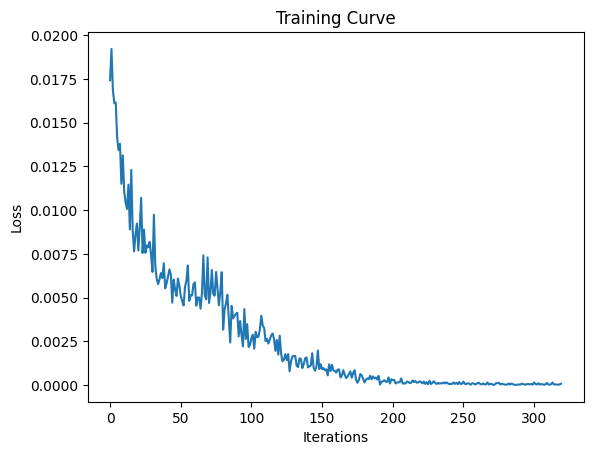

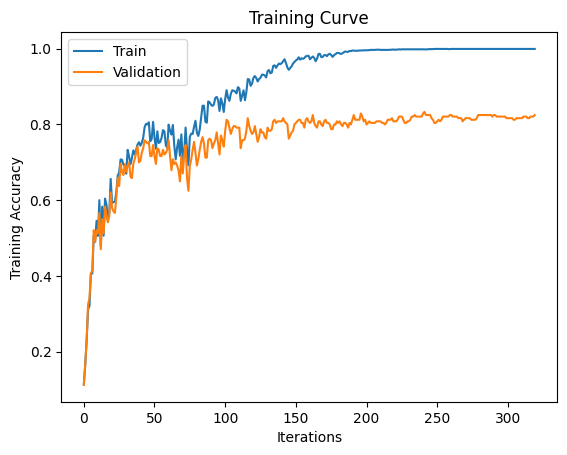

Final Training Accuracy: 0.9994848016486347
Final Validation Accuracy: 0.825


In [ ]:
## tuning batch size

model = GestureCNN()

if torch.cuda.is_available():
  model.cuda(2)
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train(model, train_set, batch_size=128, num_epochs=20,learning_rate=0.01, use_cuda=use_cuda)

CUDA is available!  Training on GPU ...


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Epochs:  10%|█         | 1/10 [03:01<27:11, 181.28s/it]

Epoch [1/10], Loss: 0.0560745894908905, train_acc : 0.37506439979392064, val_acc : 0.37083333333333335, Time: 181.28 seconds


Epochs:  20%|██        | 2/10 [05:57<23:46, 178.30s/it]

Epoch [2/10], Loss: 0.04901042580604553, train_acc : 0.42143225141679547, val_acc : 0.42083333333333334, Time: 357.50 seconds


Epochs:  30%|███       | 3/10 [09:33<22:49, 195.69s/it]

Epoch [3/10], Loss: 0.043528344482183456, train_acc : 0.5332302936630603, val_acc : 0.5333333333333333, Time: 573.88 seconds


Epochs:  40%|████      | 4/10 [13:09<20:21, 203.60s/it]

Epoch [4/10], Loss: 0.03266675025224686, train_acc : 0.5280783101494075, val_acc : 0.5375, Time: 789.60 seconds


Epochs:  50%|█████     | 5/10 [16:45<17:20, 208.12s/it]

Epoch [5/10], Loss: 0.027251921594142914, train_acc : 0.577537351880474, val_acc : 0.5708333333333333, Time: 1005.74 seconds


Epochs:  60%|██████    | 6/10 [20:28<14:12, 213.10s/it]

Epoch [6/10], Loss: 0.03701115399599075, train_acc : 0.6506955177743431, val_acc : 0.6083333333333333, Time: 1228.50 seconds


Epochs:  70%|███████   | 7/10 [24:07<10:44, 214.92s/it]

Epoch [7/10], Loss: 0.029782122001051903, train_acc : 0.6450283359093251, val_acc : 0.6375, Time: 1447.16 seconds


Epochs:  80%|████████  | 8/10 [27:50<07:15, 217.67s/it]

Epoch [8/10], Loss: 0.021420197561383247, train_acc : 0.7650695517774343, val_acc : 0.7166666666666667, Time: 1670.74 seconds


Epochs:  90%|█████████ | 9/10 [31:32<03:39, 219.08s/it]

Epoch [9/10], Loss: 0.01896730251610279, train_acc : 0.7908294693456981, val_acc : 0.6916666666666667, Time: 1892.90 seconds


Epochs: 100%|██████████| 10/10 [35:16<00:00, 211.69s/it]

Epoch [10/10], Loss: 0.009688672609627247, train_acc : 0.8382277176713034, val_acc : 0.7625, Time: 2116.91 seconds


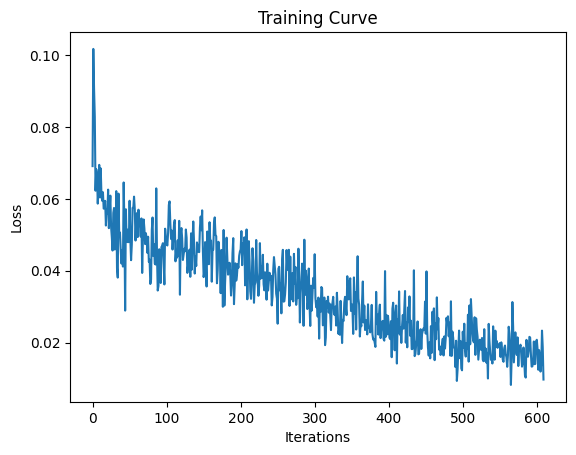

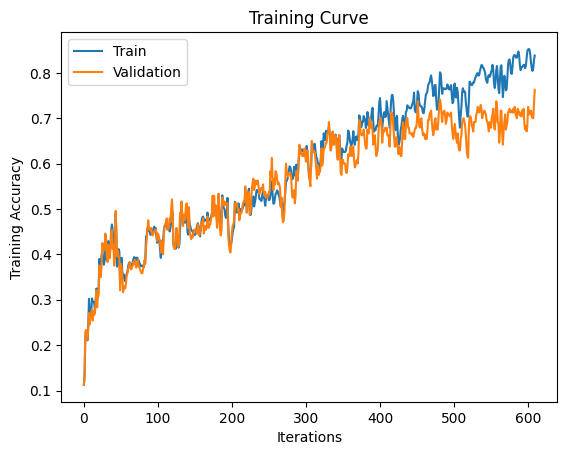

Final Training Accuracy: 0.8382277176713034
Final Validation Accuracy: 0.7625


In [ ]:
# tuning learning rate

model = GestureCNN()

if torch.cuda.is_available():
  model.cuda(2)
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train(model, train_set, batch_size=32, num_epochs=10,learning_rate=0.01, use_cuda=use_cuda)

CUDA is available!  Training on GPU ...


Epochs:   7%|▋         | 1/15 [00:59<13:47, 59.08s/it]

Epoch [1/15], Loss: 0.016802046447992325, train_acc : 0.19371458011334364, val_acc : 0.2, Time: 59.08 seconds


Epochs:  13%|█▎        | 2/15 [01:59<13:00, 60.05s/it]

Epoch [2/15], Loss: 0.016013262793421745, train_acc : 0.21071612570839773, val_acc : 0.20416666666666666, Time: 119.80 seconds


Epochs:  20%|██        | 3/15 [02:58<11:53, 59.48s/it]

Epoch [3/15], Loss: 0.015176661312580109, train_acc : 0.23235445646573932, val_acc : 0.22083333333333333, Time: 178.61 seconds


Epochs:  27%|██▋       | 4/15 [03:57<10:52, 59.31s/it]

Epoch [4/15], Loss: 0.013605066575109959, train_acc : 0.2534775888717156, val_acc : 0.2375, Time: 237.67 seconds


Epochs:  33%|███▎      | 5/15 [04:57<09:53, 59.35s/it]

Epoch [5/15], Loss: 0.013064221478998661, train_acc : 0.2715095311695003, val_acc : 0.25833333333333336, Time: 297.08 seconds


Epochs:  40%|████      | 6/15 [05:56<08:53, 59.30s/it]

Epoch [6/15], Loss: 0.014048980548977852, train_acc : 0.40649149922720246, val_acc : 0.3958333333333333, Time: 356.29 seconds


Epochs:  47%|████▋     | 7/15 [06:56<07:57, 59.63s/it]

Epoch [7/15], Loss: 0.013225945644080639, train_acc : 0.39824832560535806, val_acc : 0.4166666666666667, Time: 416.60 seconds


Epochs:  53%|█████▎    | 8/15 [07:56<06:59, 59.86s/it]

Epoch [8/15], Loss: 0.01175397727638483, train_acc : 0.42864502833590934, val_acc : 0.4125, Time: 476.96 seconds


Epochs:  60%|██████    | 9/15 [08:56<05:58, 59.76s/it]

Epoch [9/15], Loss: 0.011690560728311539, train_acc : 0.437403400309119, val_acc : 0.42916666666666664, Time: 536.48 seconds


Epochs:  67%|██████▋   | 10/15 [09:55<04:57, 59.56s/it]

Epoch [10/15], Loss: 0.010775195434689522, train_acc : 0.4441009788768676, val_acc : 0.475, Time: 595.60 seconds


Epochs:  73%|███████▎  | 11/15 [10:57<04:00, 60.13s/it]

Epoch [11/15], Loss: 0.008145670406520367, train_acc : 0.4142194744976816, val_acc : 0.39166666666666666, Time: 657.03 seconds


Epochs:  80%|████████  | 12/15 [12:01<03:04, 61.38s/it]

Epoch [12/15], Loss: 0.009349655359983444, train_acc : 0.45543534260690366, val_acc : 0.42083333333333334, Time: 721.27 seconds


Epochs:  87%|████████▋ | 13/15 [13:06<02:04, 62.49s/it]

Epoch [13/15], Loss: 0.012193787842988968, train_acc : 0.4605873261205564, val_acc : 0.44166666666666665, Time: 786.30 seconds


Epochs:  93%|█████████▎| 14/15 [14:11<01:03, 63.34s/it]

Epoch [14/15], Loss: 0.008112536743283272, train_acc : 0.49304482225656876, val_acc : 0.4666666666666667, Time: 851.60 seconds


Epochs: 100%|██████████| 15/15 [15:15<00:00, 61.04s/it]

Epoch [15/15], Loss: 0.009875881485641003, train_acc : 0.5347758887171561, val_acc : 0.475, Time: 915.64 seconds


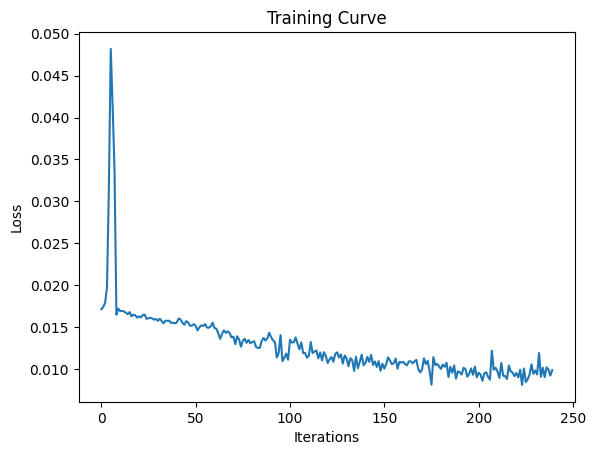

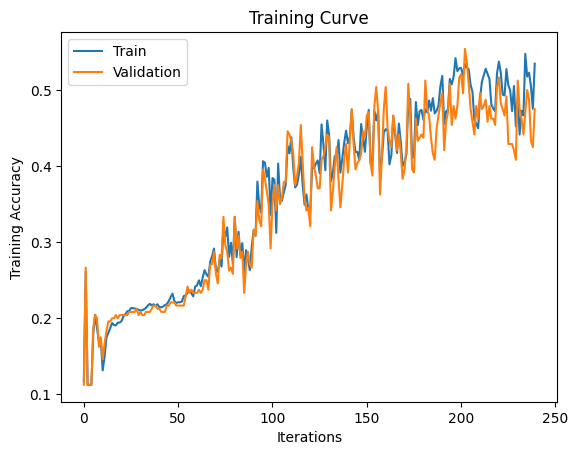

Final Training Accuracy: 0.5347758887171561
Final Validation Accuracy: 0.475


In [ ]:
# tuning learning rate

model = GestureCNN()

if torch.cuda.is_available():
  model.cuda(2)
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train(model, train_set, batch_size=128, num_epochs=15,learning_rate=0.02, use_cuda=use_cuda)

CUDA is available!  Training on GPU ...


Epochs:   0%|          | 0/15 [00:00<?, ?it/s]

Epochs:   7%|▋         | 1/15 [00:47<10:59, 47.13s/it]

Epoch [1/15], Loss: 0.014964556321501732, train_acc : 0.2792375064399794, val_acc : 0.2708333333333333, Time: 47.12 seconds


Epochs:  13%|█▎        | 2/15 [01:34<10:14, 47.27s/it]

Epoch [2/15], Loss: 0.005511236842721701, train_acc : 0.6568778979907264, val_acc : 0.65, Time: 94.49 seconds


Epochs:  20%|██        | 3/15 [02:21<09:27, 47.27s/it]

Epoch [3/15], Loss: 0.007312755566090345, train_acc : 0.7490984028851108, val_acc : 0.7166666666666667, Time: 141.76 seconds


Epochs:  27%|██▋       | 4/15 [03:22<09:36, 52.44s/it]

Epoch [4/15], Loss: 0.0038487748242914677, train_acc : 0.7722823286965482, val_acc : 0.7208333333333333, Time: 202.12 seconds


Epochs:  33%|███▎      | 5/15 [04:37<10:06, 60.70s/it]

Epoch [5/15], Loss: 0.0016807684442028403, train_acc : 0.8191653786707882, val_acc : 0.7541666666666667, Time: 277.45 seconds


Epochs:  40%|████      | 6/15 [05:51<09:48, 65.38s/it]

Epoch [6/15], Loss: 0.0026660566218197346, train_acc : 0.8861411643482741, val_acc : 0.8166666666666667, Time: 351.94 seconds


Epochs:  47%|████▋     | 7/15 [07:07<09:09, 68.63s/it]

Epoch [7/15], Loss: 0.0020873670000582933, train_acc : 0.9005667181865018, val_acc : 0.7833333333333333, Time: 427.24 seconds


Epochs:  53%|█████▎    | 8/15 [08:19<08:08, 69.82s/it]

Epoch [8/15], Loss: 0.002196424873545766, train_acc : 0.9376609994848016, val_acc : 0.7791666666666667, Time: 499.61 seconds


Epochs:  60%|██████    | 9/15 [09:34<07:08, 71.39s/it]

Epoch [9/15], Loss: 0.0024243041407316923, train_acc : 0.970118495620814, val_acc : 0.7916666666666666, Time: 574.47 seconds


Epochs:  67%|██████▋   | 10/15 [10:49<06:02, 72.47s/it]

Epoch [10/15], Loss: 0.0019441754557192326, train_acc : 0.9763008758371973, val_acc : 0.7791666666666667, Time: 649.34 seconds


Epochs:  73%|███████▎  | 11/15 [12:04<04:53, 73.28s/it]

Epoch [11/15], Loss: 0.0003823706356342882, train_acc : 0.9829984544049459, val_acc : 0.7833333333333333, Time: 724.47 seconds


Epochs:  80%|████████  | 12/15 [13:19<03:41, 73.93s/it]

Epoch [12/15], Loss: 0.0009090977837331593, train_acc : 0.9819680577022154, val_acc : 0.7875, Time: 799.87 seconds


Epochs:  87%|████████▋ | 13/15 [14:32<02:27, 73.59s/it]

Epoch [13/15], Loss: 0.001410993398167193, train_acc : 0.9974240082431737, val_acc : 0.8083333333333333, Time: 872.68 seconds


Epochs:  93%|█████████▎| 14/15 [15:44<01:13, 73.13s/it]

Epoch [14/15], Loss: 0.0002521288697607815, train_acc : 0.9948480164863472, val_acc : 0.8, Time: 944.76 seconds


Epochs: 100%|██████████| 15/15 [16:55<00:00, 67.72s/it]

Epoch [15/15], Loss: 0.00023243318719323725, train_acc : 0.9994848016486347, val_acc : 0.8041666666666667, Time: 1015.83 seconds


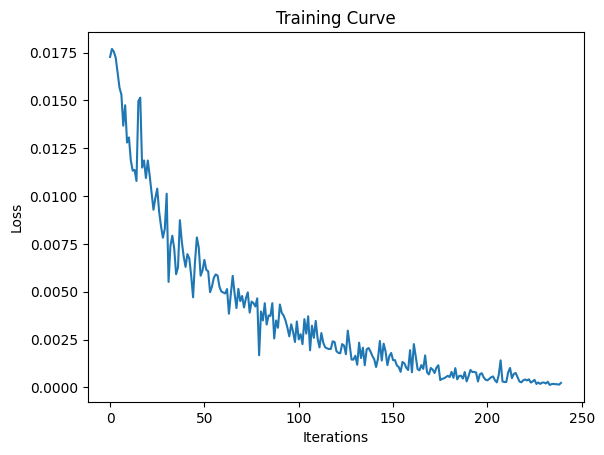

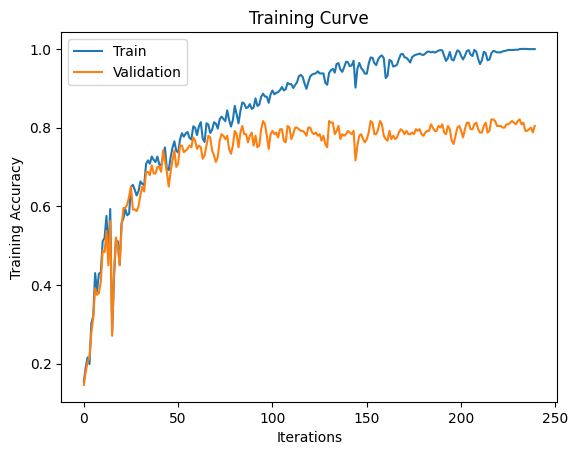

Final Training Accuracy: 0.9994848016486347
Final Validation Accuracy: 0.8041666666666667


In [ ]:
# tuning learning rate

model = GestureCNN()

if torch.cuda.is_available():
  model.cuda(2)
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train(model, train_set, batch_size=128, num_epochs=15,learning_rate=0.005, use_cuda=use_cuda)

In [ ]:
class GestureCNN_with_5(nn.Module):
    def __init__(self):
        super(GestureCNN_with_5, self).__init__()
        self.name = "GestureCNN_with_5"
        self.conv1 = nn.Conv2d(3, 6, 5, padding=1) # in_channel, out_channel, kernel size
        self.pool = nn.MaxPool2d(2, 2)  # Pooling
        self.conv2 = nn.Conv2d(6, 12, 3, padding=1)
        self.fc1 = nn.Linear(12 * 55 * 55, 64)  # Fully connected 1
        self.fc2 = nn.Linear(64, 9) # Fully connected 2, output 9 categories
        self.batchN1 = nn.BatchNorm2d(6)
        self.batchN2 = nn.BatchNorm2d(12)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.batchN1(self.conv1(x))))
        x = self.pool(nn.functional.relu(self.batchN2(self.conv2(x))))
        x = x.view(-1,12 * 55 * 55)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

CUDA is available!  Training on GPU ...


Epochs:   0%|          | 0/15 [00:00<?, ?it/s]

Epochs:   7%|▋         | 1/15 [01:11<16:43, 71.65s/it]

Epoch [1/15], Loss: 0.01266901008784771, train_acc : 0.44307058217413703, val_acc : 0.3875, Time: 71.65 seconds


Epochs:  13%|█▎        | 2/15 [02:23<15:36, 72.04s/it]

Epoch [2/15], Loss: 0.013228394091129303, train_acc : 0.6543019062339, val_acc : 0.6833333333333333, Time: 143.96 seconds


Epochs:  20%|██        | 3/15 [03:36<14:26, 72.18s/it]

Epoch [3/15], Loss: 0.004757252987474203, train_acc : 0.7300360638845955, val_acc : 0.7291666666666666, Time: 216.30 seconds


Epochs:  27%|██▋       | 4/15 [04:51<13:29, 73.55s/it]

Epoch [4/15], Loss: 0.0077068982645869255, train_acc : 0.783101494075219, val_acc : 0.7041666666666667, Time: 291.96 seconds


Epochs:  33%|███▎      | 5/15 [06:09<12:29, 74.97s/it]

Epoch [5/15], Loss: 0.005665536038577557, train_acc : 0.8176197836166924, val_acc : 0.7666666666666667, Time: 369.45 seconds


Epochs:  40%|████      | 6/15 [07:25<11:18, 75.34s/it]

Epoch [6/15], Loss: 0.00439808052033186, train_acc : 0.8531684698608965, val_acc : 0.7458333333333333, Time: 445.51 seconds


Epochs:  47%|████▋     | 7/15 [08:39<09:59, 74.90s/it]

Epoch [7/15], Loss: 0.0014615071704611182, train_acc : 0.88768675940237, val_acc : 0.7958333333333333, Time: 519.49 seconds


Epochs:  53%|█████▎    | 8/15 [09:50<08:36, 73.77s/it]

Epoch [8/15], Loss: 0.001534493756480515, train_acc : 0.9314786192684184, val_acc : 0.8083333333333333, Time: 590.84 seconds


Epochs:  60%|██████    | 9/15 [11:05<07:24, 74.17s/it]

Epoch [9/15], Loss: 0.0005996886757202446, train_acc : 0.9144770736733643, val_acc : 0.775, Time: 665.88 seconds


Epochs:  67%|██████▋   | 10/15 [12:20<06:11, 74.30s/it]

Epoch [10/15], Loss: 0.0010066891554743052, train_acc : 0.9562081401339516, val_acc : 0.7625, Time: 740.47 seconds


Epochs:  73%|███████▎  | 11/15 [13:36<04:59, 74.84s/it]

Epoch [11/15], Loss: 0.0003319492388982326, train_acc : 0.9835136527563112, val_acc : 0.8083333333333333, Time: 816.53 seconds


Epochs:  80%|████████  | 12/15 [14:49<03:43, 74.38s/it]

Epoch [12/15], Loss: 6.631183350691572e-05, train_acc : 0.9969088098918083, val_acc : 0.8041666666666667, Time: 889.85 seconds


Epochs:  87%|████████▋ | 13/15 [16:03<02:28, 74.29s/it]

Epoch [13/15], Loss: 5.382180097512901e-05, train_acc : 0.9984544049459042, val_acc : 0.7958333333333333, Time: 963.96 seconds


Epochs:  93%|█████████▎| 14/15 [17:18<01:14, 74.37s/it]

Epoch [14/15], Loss: 0.00013124886027071625, train_acc : 1.0, val_acc : 0.8208333333333333, Time: 1038.51 seconds


Epochs: 100%|██████████| 15/15 [18:26<00:00, 73.76s/it]

Epoch [15/15], Loss: 0.0002287756942678243, train_acc : 1.0, val_acc : 0.8041666666666667, Time: 1106.37 seconds


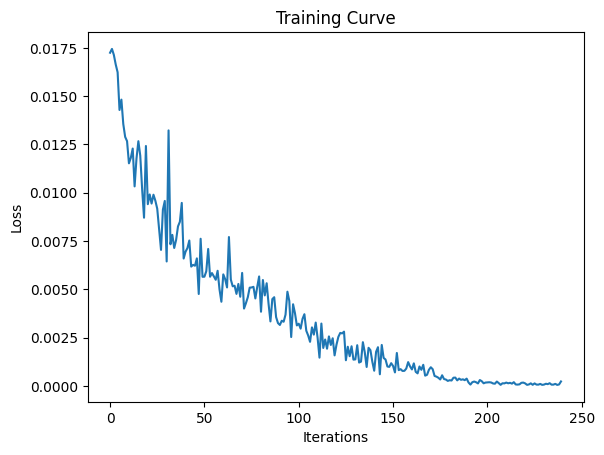

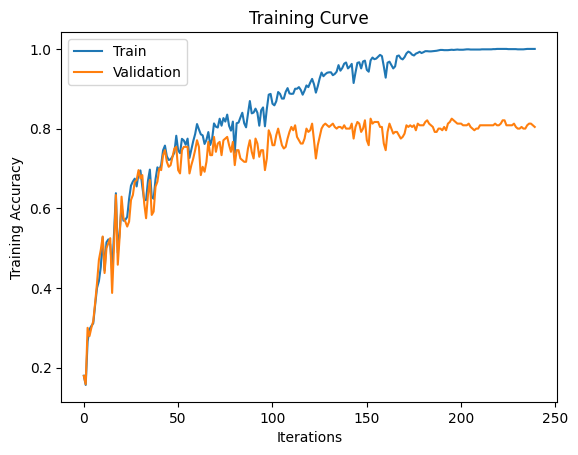

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.8041666666666667


In [ ]:
# tuning kernel size

model = GestureCNN_with_5()

if torch.cuda.is_available():
  model.cuda(2)
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train(model, train_set, batch_size=128, num_epochs=15,learning_rate=0.01, use_cuda=use_cuda)

### Part (iii) - [2pt DISCUSSION]
Choose the best model out of all the ones that you have trained. Justify your choice.

In [ ]:
# tuning learning rate

model = GestureCNN()

model_path = get_model_name(model.name, batch_size=128, learning_rate=0.005, epoch=6)
state =torch.load(model_path)
model.load_state_dict(state)

<All keys matched successfully>

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

As a result of experimenting with various parameters,
the first model showed the best performance when batch size: 128, learning rate: 0.005, and epoch were 6.


'''

'\nPROVIDE YOUR ANSWER BELOW\n\n\n\n\n\n\n'

### Part (iv) - [2pt RESULTS]
Report the test accuracy of your best model. You should only do this step once and prior to this step you should have only used the training and validation data.

In [ ]:
# TO BE COMPLETED

correct = 0
total = 0

if torch.cuda.is_available():
  model.cuda(2)
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')


for imgs, labels in torch.utils.data.DataLoader(test_set, batch_size=128):

    #############################################
    #To Enable GPU Usage
    if use_cuda:
        imgs = imgs.cuda(2)
        labels = labels.cuda(2)
    #############################################
    output = model(imgs)

    #select index with maximum prediction score
    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += imgs.shape[0]
reuslt = correct / total
print('Test Acc : ', reuslt)



CUDA is available!  Training on GPU ...


Test Acc :  0.68


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

My best model test Acc : 0.68
'''

'\nPROVIDE YOUR ANSWER BELOW\n\nMy best model test Acc : 0.68\n'

## Part 4. Transfer Learning [8pt]
For many image classification tasks, it is generally not a good idea to train a very large deep neural network
model from scratch due to the enormous compute requirements and lack of sufficient amounts of training
data.

One of the better options is to try using an existing model that performs a similar task to the one you need
to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed **Transfer
Learning**. In this assignment, we will use Transfer Learning to extract features from the hand gesture
images. Then, train a smaller network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, convolution layers extract various features from the images which
get utilized by the fully connected layers for correct classification. AlexNet architecture played a pivotal
role in establishing Deep Neural Nets as a go-to tool for image classification problems and we will use an
ImageNet pre-trained AlexNet model to extract features in this assignment.

### Part (i) - [2pt EXPLORATORY]
Here is the code to load the AlexNet network, with pretrained weights. When you first run the code, PyTorch
will download the pretrained weights from the internet.

In [ ]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

The alexnet model is split up into two components: *alexnet.features* and *alexnet.classifier*. The
first neural network component, *alexnet.features*, is used to compute convolutional features, which are
taken as input in *alexnet.classifier*.

The neural network alexnet.features expects an image tensor of shape Nx3x224x224 as input and it will
output a tensor of shape Nx256x6x6 . (N = batch size).

Compute the AlexNet features for each of your training, validation, and test data. Here is an example code
snippet showing how you can compute the AlexNet features for some images (your actual code might be
different):

In [ ]:
# img = ... a PyTorch tensor with shape [N,3,224,224] containing hand images ...
train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True)
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=True)

**Save the computed features**. You will be using these features as input to your neural network in Part
(ii), and you do not want to re-compute the features every time. Instead, run *alexnet.features* once for
each image, and save the result.

In [ ]:
features = []
for imgs, labels in iter(train_loader):
  feature = alexnet.features(imgs) #SLOW
  features.append(feature)
print("features length : ", len(features))

features length :  16


### Part (ii) - [2pt MODEL]
Build a convolutional neural network model that takes as input these AlexNet features, and makes a
prediction. Your model should be a subclass of nn.Module.

Explain your choice of neural network architecture: how many layers did you choose? What types of layers
did you use: fully-connected or convolutional? What about other decisions like pooling layers, activation
functions, number of channels / hidden units in each layer?

Here is an example of how your model may be called:

In [ ]:
# features = ... load precomputed alexnet.features(img) ...
# output = model(features)
# prob = F.softmax(output)

In [ ]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.name = "ANN"
        self.fc1 = nn.Linear(256 * 6 * 6, 128)
        self.fc2 = nn.Linear(128, 9)

    def forward(self, x):
        x = x.view(-1, 256 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

This neural network architecture is a fully connected neural network, summarized as follows:

Input Layer: Flattens the input data to a size of 256x6x6.
Hidden Layers: The first hidden layer consists of 128 neurons. ReLU activation function is applied to introduce non-linearity.
Output Layer: The output layer consists of 9 neurons. It produces scores for each class.
Activation Function: ReLU activation function is used in the hidden layer.
Number of Layers: The network has input, hidden, and output layers, totaling three layers.
Pooling Layers: There are no pooling layers in this architecture. Number of Channels / Hidden Units:
Input Layer: There are no channels since the input is flattened. Input size is 256x6x6.
Hidden Layer: The first fully connected layer has 128 hidden units.
Output Layer: There are 9 output units, each corresponding to a class score.


'''

'\nPROVIDE YOUR ANSWER BELOW\n\n\n\n\n\n\n'

### Part (iii) - [1pt MODEL]
Train your new network, including any hyperparameter tuning. Plot and submit the training curve of your
best model only.

Note: Depending on how you are caching (saving) your AlexNet features, PyTorch might still be tracking
updates to the **AlexNet weights**, which we are not tuning. One workaround is to convert your AlexNet
feature tensor into a numpy array, and then back into a PyTorch tensor.

In [ ]:
def get_model_name(name, batch_size, learning_rate, epoch):

    if not os.path.exists("checkpoint"):
        os.makedirs("checkpoint")

    path = "checkpoint/model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                               batch_size,
                                                               learning_rate,
                                                               epoch)

    return path


def get_accuracy_with_Alex(model, batch_size=64, train=False, use_cuda=False):
    if train:
        data = train_set
    else:
        data = validation_set

    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size):

        imgs = alexnet.features(imgs)
        #############################################
        #To Enable GPU Usage
        if use_cuda:
          imgs = imgs.cuda(2)
          labels = labels.cuda(2)
        #############################################
        output = model(imgs)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

def train_with_Alex(model, data, batch_size=64, num_epochs=1, learning_rate = 0.01, use_cuda=False):
    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    start_time = time.time()
    for epoch in tqdm(range(num_epochs), desc="Epochs"):

      for i, (imgs, labels) in enumerate(train_loader, 0):

        imgs = alexnet.features(imgs)
        #############################################
        #To Enable GPU Usage
        if use_cuda:
          imgs = imgs.cuda(2)
          labels = labels.cuda(2)
        #############################################

        out = model(imgs)             # forward pass
        loss = criterion(out, labels) # compute the total loss
        loss.backward()               # backward pass (compute parameter updates)
        optimizer.step()              # make the updates for each parameter
        optimizer.zero_grad()         # a clean up step for PyTorch

        # save the current training information
        iters.append(n)
        losses.append(float(loss)/batch_size)             # compute *average* loss
        train_acc.append(get_accuracy_with_Alex(model, batch_size=batch_size, train=True, use_cuda=use_cuda)) # compute training accuracy
        val_acc.append(get_accuracy_with_Alex(model, batch_size=batch_size, train=False, use_cuda=use_cuda))  # compute validation accuracy
        n += 1


      end_time = time.time()
      elapsed_time = end_time - start_time
      model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
      torch.save(model.state_dict(), model_path)
      print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {float(loss)/batch_size}, train_acc : {train_acc[-1]}, val_acc : {val_acc[-1]}, Time: {elapsed_time:.2f} seconds')


    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

CUDA is available!  Training on GPU ...


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Epochs:  10%|█         | 1/10 [01:21<12:15, 81.74s/it]

Epoch [1/10], Loss: 0.007953370921313763, train_acc : 0.7454920144255538, val_acc : 0.7375, Time: 81.74 seconds


Epochs:  20%|██        | 2/10 [02:44<10:57, 82.23s/it]

Epoch [2/10], Loss: 0.002041636034846306, train_acc : 0.8047398248325606, val_acc : 0.8041666666666667, Time: 164.32 seconds


Epochs:  30%|███       | 3/10 [04:05<09:33, 81.98s/it]

Epoch [3/10], Loss: 0.004553648177534342, train_acc : 0.9185986604842864, val_acc : 0.8791666666666667, Time: 245.99 seconds


Epochs:  40%|████      | 4/10 [05:27<08:11, 81.93s/it]

Epoch [4/10], Loss: 0.0036569414660334587, train_acc : 0.9283874291602267, val_acc : 0.8958333333333334, Time: 327.86 seconds


Epochs:  50%|█████     | 5/10 [06:49<06:49, 81.93s/it]

Epoch [5/10], Loss: 0.0005642730975523591, train_acc : 0.9613601236476044, val_acc : 0.9166666666666666, Time: 409.78 seconds


Epochs:  60%|██████    | 6/10 [08:12<05:28, 82.10s/it]

Epoch [6/10], Loss: 0.0023310219403356314, train_acc : 0.9634209170530654, val_acc : 0.9166666666666666, Time: 492.20 seconds


Epochs:  70%|███████   | 7/10 [09:34<04:06, 82.03s/it]

Epoch [7/10], Loss: 0.0012516892747953534, train_acc : 0.975785677485832, val_acc : 0.925, Time: 574.11 seconds


Epochs:  80%|████████  | 8/10 [10:55<02:43, 81.95s/it]

Epoch [8/10], Loss: 0.0009190881974063814, train_acc : 0.9747552807831015, val_acc : 0.9083333333333333, Time: 655.88 seconds


Epochs:  90%|█████████ | 9/10 [12:17<01:21, 81.91s/it]

Epoch [9/10], Loss: 0.0017171400832012296, train_acc : 0.9799072642967542, val_acc : 0.925, Time: 737.69 seconds


Epochs: 100%|██████████| 10/10 [13:40<00:00, 82.06s/it]

Epoch [10/10], Loss: 0.0001308336650254205, train_acc : 0.9824832560535807, val_acc : 0.925, Time: 820.57 seconds


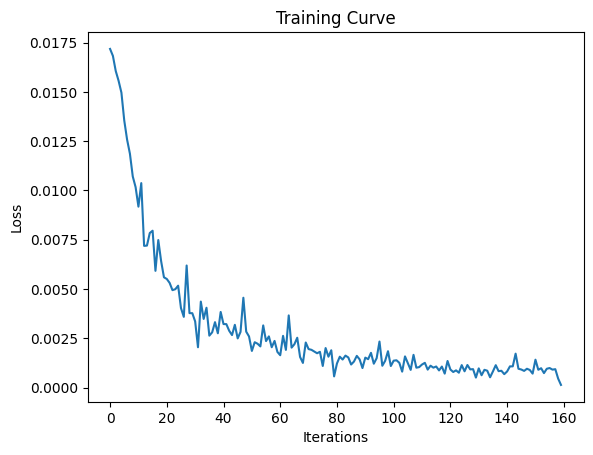

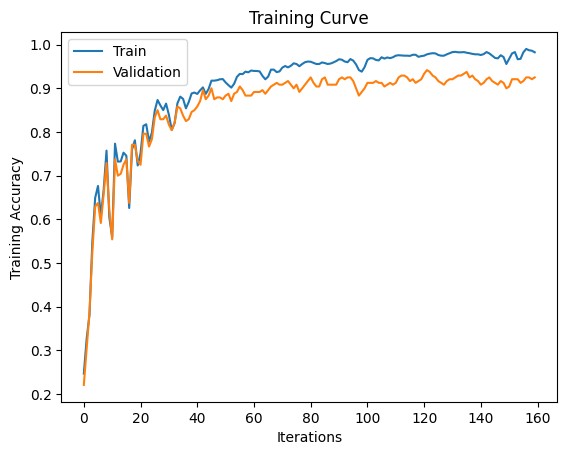

Final Training Accuracy: 0.9824832560535807
Final Validation Accuracy: 0.925


In [ ]:
model = ANN()

if torch.cuda.is_available():
  model.cuda(2)
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_with_Alex(model, train_set, batch_size=128, num_epochs=10,learning_rate=0.005, use_cuda=use_cuda)

CUDA is available!  Training on GPU ...


Epochs:  10%|█         | 1/10 [01:22<12:19, 82.14s/it]

Epoch [1/10], Loss: 0.0039674402214586735, train_acc : 0.7563111798042246, val_acc : 0.7416666666666667, Time: 82.13 seconds


Epochs:  20%|██        | 2/10 [02:43<10:54, 81.80s/it]

Epoch [2/10], Loss: 0.003583337878808379, train_acc : 0.8093766099948481, val_acc : 0.7875, Time: 163.69 seconds


Epochs:  30%|███       | 3/10 [04:05<09:33, 81.99s/it]

Epoch [3/10], Loss: 0.0015610087430104613, train_acc : 0.895414734672849, val_acc : 0.8708333333333333, Time: 245.90 seconds


Epochs:  40%|████      | 4/10 [05:28<08:12, 82.07s/it]

Epoch [4/10], Loss: 0.0010699444683268666, train_acc : 0.949510561566203, val_acc : 0.8916666666666667, Time: 328.11 seconds


Epochs:  50%|█████     | 5/10 [06:50<06:50, 82.05s/it]

Epoch [5/10], Loss: 0.0012653518933802843, train_acc : 0.9319938176197836, val_acc : 0.8875, Time: 410.12 seconds


Epochs:  60%|██████    | 6/10 [08:12<05:28, 82.15s/it]

Epoch [6/10], Loss: 0.000896899146027863, train_acc : 0.964451313755796, val_acc : 0.9083333333333333, Time: 492.46 seconds


Epochs:  70%|███████   | 7/10 [09:35<04:07, 82.39s/it]

Epoch [7/10], Loss: 0.0003521819016896188, train_acc : 0.9783616692426584, val_acc : 0.925, Time: 575.34 seconds


Epochs:  80%|████████  | 8/10 [10:57<02:44, 82.23s/it]

Epoch [8/10], Loss: 0.000686221697833389, train_acc : 0.9896960329726945, val_acc : 0.9333333333333333, Time: 657.22 seconds


Epochs:  90%|█████████ | 9/10 [12:18<01:21, 81.99s/it]

Epoch [9/10], Loss: 0.00021106551866978407, train_acc : 0.9912416280267903, val_acc : 0.9333333333333333, Time: 738.67 seconds


Epochs: 100%|██████████| 10/10 [13:41<00:00, 82.11s/it]

Epoch [10/10], Loss: 0.0003108633973170072, train_acc : 0.9948480164863472, val_acc : 0.9375, Time: 821.08 seconds


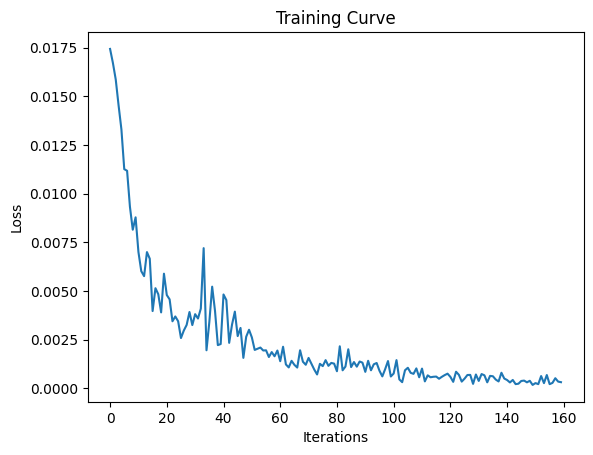

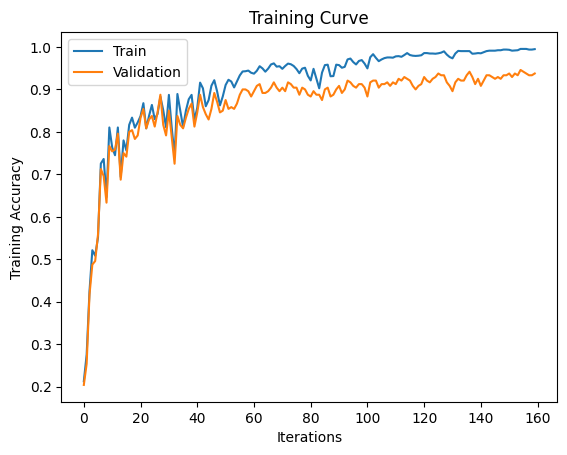

Final Training Accuracy: 0.9948480164863472
Final Validation Accuracy: 0.9375


In [ ]:
model = ANN()

if torch.cuda.is_available():
  model.cuda(2)
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_with_Alex(model, train_set, batch_size=128, num_epochs=10,learning_rate=0.01, use_cuda=use_cuda)

CUDA is available!  Training on GPU ...


Epochs:  10%|█         | 1/10 [02:27<22:11, 147.97s/it]

Epoch [1/10], Loss: 0.006301064044237137, train_acc : 0.8526532715095312, val_acc : 0.8083333333333333, Time: 147.96 seconds


Epochs:  20%|██        | 2/10 [04:56<19:48, 148.53s/it]

Epoch [2/10], Loss: 0.005236877128481865, train_acc : 0.9124162802679031, val_acc : 0.9, Time: 296.88 seconds


Epochs:  30%|███       | 3/10 [07:26<17:22, 148.97s/it]

Epoch [3/10], Loss: 0.0015077994903549552, train_acc : 0.9541473467284904, val_acc : 0.9083333333333333, Time: 446.39 seconds


Epochs:  40%|████      | 4/10 [09:55<14:54, 149.07s/it]

Epoch [4/10], Loss: 0.002608868293464184, train_acc : 0.9639361154044307, val_acc : 0.8958333333333334, Time: 595.60 seconds


Epochs:  50%|█████     | 5/10 [12:24<12:25, 149.11s/it]

Epoch [5/10], Loss: 0.003999838139861822, train_acc : 0.975785677485832, val_acc : 0.9208333333333333, Time: 744.78 seconds


Epochs:  60%|██████    | 6/10 [14:53<09:56, 149.06s/it]

Epoch [6/10], Loss: 0.0008044855785556138, train_acc : 0.9799072642967542, val_acc : 0.925, Time: 893.74 seconds


Epochs:  70%|███████   | 7/10 [17:22<07:26, 148.93s/it]

Epoch [7/10], Loss: 0.0023792784195393324, train_acc : 0.9953632148377125, val_acc : 0.9416666666666667, Time: 1042.42 seconds


Epochs:  80%|████████  | 8/10 [19:51<04:58, 149.02s/it]

Epoch [8/10], Loss: 0.000882315740454942, train_acc : 0.9974240082431737, val_acc : 0.9416666666666667, Time: 1191.62 seconds


Epochs:  90%|█████████ | 9/10 [22:22<02:29, 149.64s/it]

Epoch [9/10], Loss: 0.0008619156433269382, train_acc : 0.996393611540443, val_acc : 0.9375, Time: 1342.63 seconds


Epochs: 100%|██████████| 10/10 [25:10<00:00, 151.02s/it]

Epoch [10/10], Loss: 0.0002848781587090343, train_acc : 0.9953632148377125, val_acc : 0.9416666666666667, Time: 1510.20 seconds


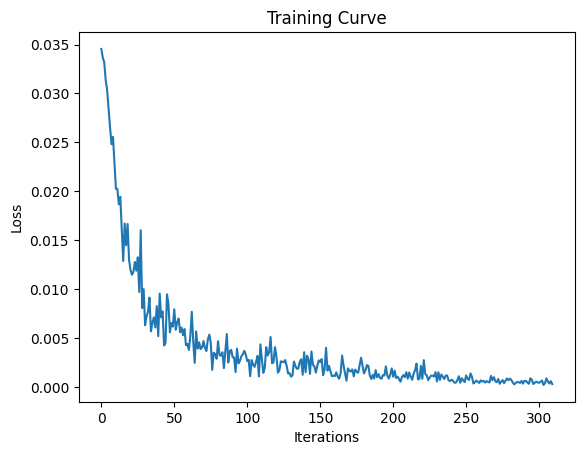

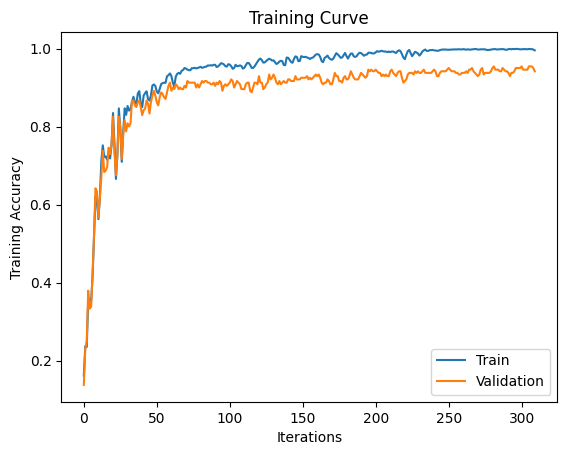

Final Training Accuracy: 0.9953632148377125
Final Validation Accuracy: 0.9416666666666667


In [ ]:
model = ANN()

if torch.cuda.is_available():
  model.cuda(2)
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_with_Alex(model, train_set, batch_size=64, num_epochs=10,learning_rate=0.005, use_cuda=use_cuda)

### Part (iv) - [2pt RESULTS]
Report the test accuracy of your best model. How does the test accuracy compare to Part 3(iv) without transfer learning?

In [ ]:
model = ANN()

model_path = get_model_name(model.name, batch_size=64, learning_rate=0.005, epoch=9)
state =torch.load(model_path)
model.load_state_dict(state)

<All keys matched successfully>

In [ ]:
# TO BE COMPLETED

correct = 0
total = 0

if torch.cuda.is_available():
  model.cuda(2)
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')


for imgs, labels in torch.utils.data.DataLoader(test_set, batch_size=64):

    imgs = alexnet.features(imgs)
    #############################################
    #To Enable GPU Usage
    if use_cuda:
        imgs = imgs.cuda(2)
        labels = labels.cuda(2)
    #############################################
    output = model(imgs)

    #select index with maximum prediction score
    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += imgs.shape[0]
reuslt = correct / total
print('Test Acc : ', reuslt)



CUDA is available!  Training on GPU ...


Test Acc :  0.88


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

My best model's test acc: 0.88 comes out.
We can see that this is a 20% increase over the Test Acc(0.68) of the model that did not use transfer learning

'''

"\nPROVIDE YOUR ANSWER BELOW\n\nMy best model's test acc: 0.88 comes out. \nWe can see that this is a 20% increase over the Test Acc(0.68) of the model that did not use transfer learning\n\n"

## Part 5. Testing on New Data [14pt]
As a final step in testing we will be revisiting the sample images that you had collected and submitted with your assignment. These sample images should be untouched and will be used to demonstrate how well your model works at identifying your hand guestures.



### Part (i) - [2pt EXPLORATORY]
Load and process the hand gesture images you had collected so that they can easily be evaulated by your model.

In [ ]:
# TO BE COMPLETED

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()])


train_set = torchvision.datasets.ImageFolder(root='Gesture_Dataset/train', transform=transform)
val_set = torchvision.datasets.ImageFolder(root='Gesture_Dataset/val', transform=transform)
test_set = torchvision.datasets.ImageFolder(root='Gesture_Dataset/test', transform=transform)
Mydata_set = torchvision.datasets.ImageFolder(root='LEE_1010826714', transform=transform)



### Part (ii) - [5pt RESULTS]
Using the best transfer learning model developed in Part 4. Report the test accuracy on your sample images and how it compares to the test accuracy obtained in Part 4(iv)? Also, use your best model from Part 3 to report the test accuracy on the new sample images and how it compares to the test accuracy obtained in Part 3(iv). You should present your results in a pandas DataFrame.

This question will also be evaluated on the overal performance achieved.

In [ ]:
def get_accuracy_part5(model,dataset, batch_size=64, use_cuda=False):

    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(dataset, batch_size):

        if model.name == 'ANN':
            imgs = alexnet.features(imgs)
        #############################################
        #To Enable GPU Usage
        if use_cuda:
          imgs = imgs.cuda(2)
          labels = labels.cuda(2)
        #############################################
        output = model(imgs)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:


CNN_with_alex = ANN().cuda(2) if torch.cuda.is_available() else ANN()
model_path = get_model_name(CNN_with_alex.name, batch_size=64, learning_rate=0.005, epoch=9)
state =torch.load(model_path)
CNN_with_alex.load_state_dict(state)

alex_train_acc = get_accuracy_part5(CNN_with_alex, train_set, batch_size=64, use_cuda=True)
alex_val_acc = get_accuracy_part5(CNN_with_alex, val_set, batch_size=64, use_cuda=True)
alex_test_acc = get_accuracy_part5(CNN_with_alex, test_set, batch_size=64, use_cuda=True)
alex_Mydata_acc = get_accuracy_part5(CNN_with_alex, Mydata_set, batch_size=64, use_cuda=True)
print(f'train acc : {alex_train_acc}\nval acc : {alex_val_acc}\ntest acc : {alex_test_acc}\nmy data acc : {alex_Mydata_acc}')

print("------------------------------------------------")

CNN = GestureCNN().cuda(2) if torch.cuda.is_available() else GestureCNN()
model_path = get_model_name(CNN.name, batch_size=128, learning_rate=0.005, epoch=6)
state =torch.load(model_path)
CNN.load_state_dict(state)

train_acc = get_accuracy_part5(CNN, train_set, batch_size=64, use_cuda=True)
val_acc = get_accuracy_part5(CNN, val_set, batch_size=64, use_cuda=True)
test_acc = get_accuracy_part5(CNN, test_set, batch_size=64, use_cuda=True)
Mydata_acc = get_accuracy_part5(CNN, Mydata_set, batch_size=64, use_cuda=True)
print(f'train acc : {train_acc}\nval acc : {val_acc}\ntest acc : {test_acc}\nmy data acc : {Mydata_acc}')

train acc : 0.9953632148377125
val acc : 0.9416666666666667
test acc : 0.88
my data acc : 0.9629629629629629
------------------------------------------------
train acc : 0.8974755280783101
val acc : 0.775
test acc : 0.68
my data acc : 0.8518518518518519


In [ ]:
import pandas as pd

# 결과를 담을 딕셔너리 초기화
results = {
    'Model': [],
    'Dataset': [],
    'Accuracy': []
}

results['Model'].append('AlexNet')
results['Dataset'].append('Train')
results['Accuracy'].append(alex_train_acc)

results['Model'].append('AlexNet')
results['Dataset'].append('Validation')
results['Accuracy'].append(alex_val_acc)

results['Model'].append('AlexNet')
results['Dataset'].append('Test')
results['Accuracy'].append(alex_test_acc)

results['Model'].append('AlexNet')
results['Dataset'].append('MyData')
results['Accuracy'].append(alex_Mydata_acc)

results['Model'].append('GestureCNN')
results['Dataset'].append('Train')
results['Accuracy'].append(train_acc)

results['Model'].append('GestureCNN')
results['Dataset'].append('Validation')
results['Accuracy'].append(val_acc)

results['Model'].append('GestureCNN')
results['Dataset'].append('Test')
results['Accuracy'].append(test_acc)

results['Model'].append('GestureCNN')
results['Dataset'].append('MyData')
results['Accuracy'].append(Mydata_acc)

result = pd.DataFrame(results)



In [ ]:
result

,Model,Dataset,Accuracy
0,AlexNet,Train,0.995363
1,AlexNet,Validation,0.941667
2,AlexNet,Test,0.880000
3,AlexNet,MyData,0.962963
4,GestureCNN,Train,0.897476
5,GestureCNN,Validation,0.775000
6,GestureCNN,Test,0.680000
7,GestureCNN,MyData,0.851852


### Part (iii) - [7pt DISCUSSION]
How well did your models do for the different hand guestures? Provide an explanation for why you think your models performed the way it did? Be sure to compare the results of training, validation, testing, and also on the new data represented by your own hand gestures.

How well would this model perform if you were to deploy it in the real-world? List some things you could do to improve the model performance.

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

In part (ii), I compared my hand image with the downloaded data set.
When I tested the model using my hand shape,
the performance was not higher than the train set, but the accuracy was higher than the test set.
I think the reason it came out like this is because the data I took was cleaner than the downloaded data.
If this model is deployed,
the performance will not be bad, but the actual data is expected to have lower accuracy due to problems
such as shadows or less hands in the photo than in these images.
To solve this problem, there is a way to preprocess the data before entering it into the model.
There is also a way to learn more images (suitable for real-life situations).

'''

'\nPROVIDE YOUR ANSWER BELOW\n\nIn part (ii), I compared my hand image with the downloaded data set.\nWhen I tested the model using my hand shape, \nthe performance was not higher than the train set, but the accuracy was higher than the test set. \nI think the reason it came out like this is because the data I took was cleaner than the downloaded data.\nIf this model is deployed, \nthe performance will not be bad, but the actual data is expected to have lower accuracy due to problems \nsuch as shadows or less hands in the photo than in these images.\nTo solve this problem, there is a way to preprocess the data before entering it into the model. \nThere is also a way to learn more images (suitable for real-life situations).\n\n'

# PART C (Optional) - Bonus Challenge!

This is an optional exercise for those that finish the assignment early and would like to take on some additional challenging task.

For this bonus challenge you are asked to explore different techniques to further improve the model for more realistic scenarios where the hands may be in front of various backgrounds, be taken at different scales, rotations, and positions in the image. To build a superior image classification model you can complete one or all of the following tasks.

Tasks:

1. Test your best models (with or without transfer learning) on hand gestures images with backgrounds that are not clean and smooth. You can take your own hand gesture images, or find ones online to test your model. Comment on the performance of your model.
2. Generated additional data by performing data augmentation to replace the clean, smooth backgrounds with backgrounds with different textures. Do this on all your training, validation, and test data. This task can be done manually (could take a long time) or you can implement code that can automate the task. For Example, one approach you could take to automate this task is to use pretrained image segmentation tools to identify the hands in the images and crop them out and put them onto other backgrounds.
3. Improve on your data augmentation by applying scale, rotation, and translation transformations on different backgrounds.
4. Compare the performance of your best CNN models (with and without transfoer learning) trained with data augmentation to the results in 1. where you did not train on images with data augmentation.
5. Implement one of many region proposal tools to detect hand gestures in image frames and put a bounding box around the region with the highest confidence. You can use pretrained YOLO models, or a region proposal tool from openCV.
6. Create a short video demonstration how you can use your hand gesture recognition model to communicate a message using hand gestures.

Bonus marks will be provided based on the number of steps completed. Summarize below your results and anything intersting you learned from the steps that you completed. Bonus marks cannot be accumulated beyond the maximum assignment grade.

In [ ]:
!pip install rembg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 45.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 988.0/988.0 kB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 57.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.8/99.8 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.8/289.8 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.0/148.0 kB 62.8 MB/s eta 0:00:00
  Using cached asynctest-0.13.0-py3-none-any.whl (26 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from PIL import Image, ImageFilter

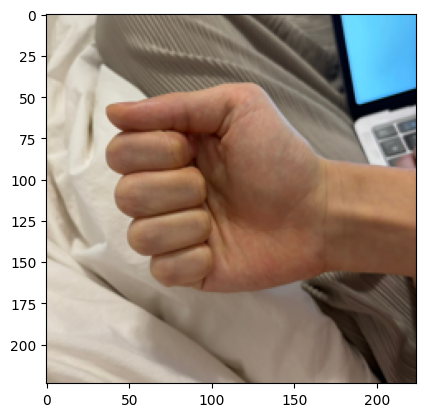

In [ ]:
image = Image.open('/home/seonghak/MIE1517/Assignment2/real_data/A/test_data.jpeg')
resized_image = image.resize((224, 224))
plt.imshow(resized_image)

In [ ]:
CNN_with_alex = ANN().cuda(2) if torch.cuda.is_available() else ANN()
model_path = get_model_name(CNN_with_alex.name, batch_size=64, learning_rate=0.005, epoch=9)
state =torch.load(model_path)
CNN_with_alex.load_state_dict(state)


alex_test_acc = get_accuracy_part5(CNN_with_alex, test_set, batch_size=64, use_cuda=True)

In [ ]:

real_data_set = torchvision.datasets.ImageFolder(root='/home/seonghak/MIE1517/Assignment2/real_data', transform=transform)

real_test_acc = get_accuracy_part5(CNN_with_alex, real_data_set, batch_size=1, use_cuda=True)

In [ ]:
print(alex_test_acc, real_test_acc)

0.88 0.0


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

I mentioned above that it doesn't seem to work well in real situations,
but it doesn't work well if there's something unnecessary in the background like this.
In the above process, you can see that although it is a single image, it does not match when a real image is inserted.


'''

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
%%shell
jupyter nbconvert --to html /content/A2_Hand_Gesture_Recognition.ipynb

(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus

# Assignment Grading Rubric
The grading of the assignment will be based on the following categories:

(0) **5 Pt - DATA** Generating new data to evaluate your model.

(1) **9 Pt - EXPLORATORY QUESTIONS** These are basic questions that in most cases can be answered without requiring a fully working and trained neural network model. For example, data loading, processing and visualization, summary statistics, data exploration, model and training setup, etc.

(2) **9 Pt - MODEL** Student has successfully implemented all the required neural network models and has demonstrated successful training of the model without any errors.

(3) **9 Pt - RESULT** Students are evaluated based on the results achieved in comparison to the expected results of the assignment.

(4) **9 Pt - DISCUSSION QUESTIONS** Student demonstrated understanding beyond the basic exploratory questions, can answer some of the more challenging questions, and provide arguments for their model selection decisions.

(5) **9 Pt - COMMUNICATION** Student has provided a quality submission that is easy to read without too many unnecessary output statements that distract the reading of the document. The code has been well commented and all the answers are communicated clearly and concisely.

(6) **10 Pt - BONUS** Student has completed the assignment and has taken on the challenging bonus tasks listed in PART C. The student has demonstrated a good understanding of all aspects of the assignment and has exceeded expectations for the assignment.



**TOTAL GRADE = _____ of 50 Pts**